In [1]:
import time
from pathlib import Path

from src import visualizations
from src.api import SegmentationAPIClient

### Setup:

In [2]:
API_URL = "http://localhost:8000"
TEST_IMAGE_PATH = Path("data/BrainTumor/test/images")

print("DINO Medical Segmentation API Demo")

# Initialize client and check API
client = SegmentationAPIClient(API_URL)

health = client.health_check()
print(f"API Status: {health.get('status', 'unknown')}")

if health.get("status") == "healthy":
    model_info = client.get_model_info()
    print(f"Model: {model_info.get('base_model', 'unknown')}")
    print(f"Classes: {model_info.get('class_names', [])}")

DINO Medical Segmentation API Demo
API Status: healthy
Model: facebook/dinov3-vitb16-pretrain-lvd1689m
Classes: ['background', 'glioma', 'meningioma', 'pituitary']


### Single Image Prediction:

Testing with: 2501_jpg.rf.a330a38d228e8f5fcfe756a0a0ce5734.jpg


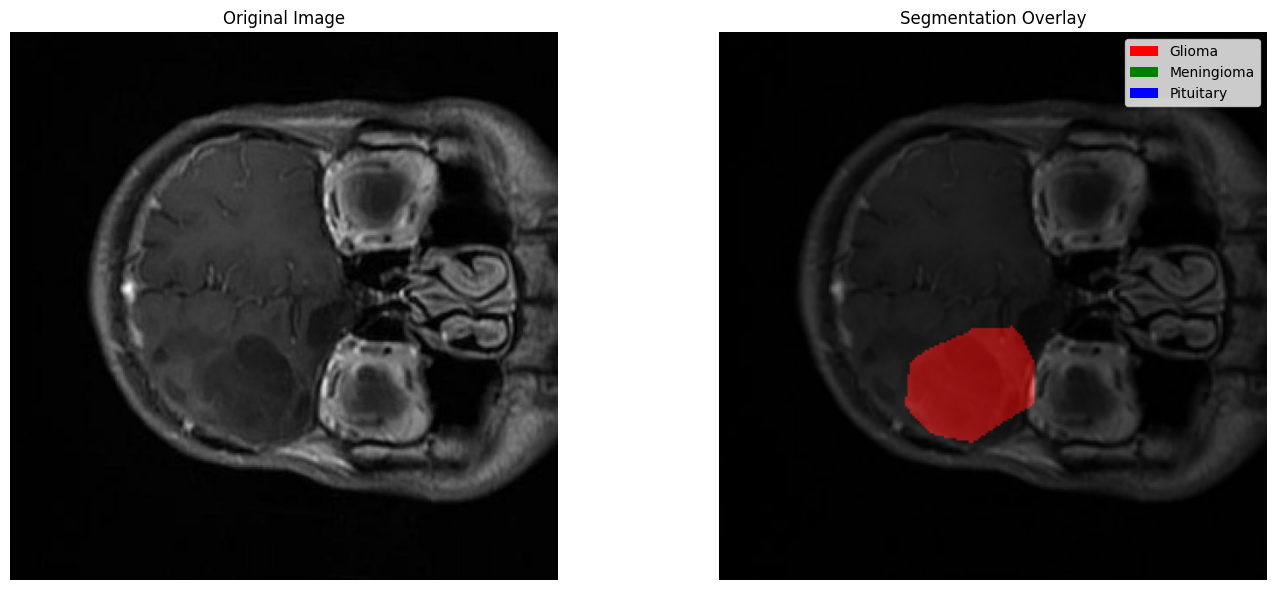


Class Percentages:
  background: 96.25%
  glioma: 3.75%


In [3]:
test_images = list(TEST_IMAGE_PATH.glob("*.jpg"))
test_image = test_images[0]
print(f"Testing with: {test_image.name}")

result = client.predict_image(test_image)
if result:
    visualizations.display_prediction_results(result, test_image)
else:
    print("Prediction failed")

### Multiple Images Comparison:

In [4]:
for i, img_path in enumerate(test_images[:3]):
    print(f"\n--- Image {i + 1}: {img_path.name} ---")
    result = client.predict_image(img_path)

    if result and result.get("success"):
        print("Class percentages:")
        for class_name, pct in result["class_percentages"].items():
            print(f"  {class_name}: {pct}%")
    else:
        print("Failed")


--- Image 1: 2501_jpg.rf.a330a38d228e8f5fcfe756a0a0ce5734.jpg ---
Class percentages:
  background: 96.25%
  glioma: 3.75%

--- Image 2: 1511_jpg.rf.f149f5d409cca5df3f6c90f716e81244.jpg ---
Class percentages:
  background: 99.95%
  pituitary: 0.05%

--- Image 3: 554_jpg.rf.a4b4fccd77171929d3c2261aceb237b6.jpg ---
Class percentages:
  background: 98.65%
  glioma: 0.03%
  meningioma: 1.32%


### Performance test:

In [5]:
# Warm up
client.predict_image(test_image)

# Time multiple requests
times = []
for i in range(3):
    start = time.time()
    client.predict_image(test_image)
    times.append(time.time() - start)

print(f"Average response time: {sum(times) / len(times):.2f}s")

Average response time: 0.06s
